### Topic 5 Statistical Modelling

In this assignment, you will perform hypothesis testing, calculate correlation coefficients, build linear regression models, and diagnose potential issues in the models using Python.

Tasks:

__1. Hypothesis__: Locate a dataset containing the heights, weights, and ages of at least 500 individual males and females. Conduct a hypothesis test to determine whether there is a significant difference in the mean weight between males and females. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

__2. Correlation Coefficient__: Using the same dataset as in Task 1, calculate the correlation coefficient between height and weight. Interpret the coefficient and visualize the relationship between the two variables using a scatter plot. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

__3. Linear Regression Model__:  Using the same dataset as in Task 1, build a linear regression model to predict weight based on height. Perform model verification to determine potential issues, such as heteroscedasticity or multicollinearity, and address any identified issues. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

__4. Multiple Regression Model__: Continuing with the dataset from Task 3, build a multiple regression model to predict weight based on height and age. Perform model verification to determine potential issues, such as heteroscedasticity or multicollinearity, and address any identified issues. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

__5. Solutions__: Identify and discuss two common assumptions of linear regression models. Using a dataset of your choice, build a linear regression model that violates one of these assumptions. Perform model verification to determine any violation and propose a solution to address the issue. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

__6.Nonlinear Model__: Using the same dataset as in Task 5, propose a non-linear model to predict the response variable. Compare the performance of the non-linear model to that of the linear regression model built in Task 5, using appropriate metrics. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

### Data Preprocessing

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import Ridge
from statsmodels.formula.api import ols
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import PolynomialFeatures

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
#read data to dataframe
data = pd.read_csv('athlete_events.csv')

In [3]:
df = pd.DataFrame(data)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
#lets start by dropping null values and duplicate name values
df = df.dropna()
df = df.drop_duplicates(subset='Name')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20732 entries, 40 to 271102
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      20732 non-null  int64  
 1   Name    20732 non-null  object 
 2   Sex     20732 non-null  object 
 3   Age     20732 non-null  float64
 4   Height  20732 non-null  float64
 5   Weight  20732 non-null  float64
 6   Team    20732 non-null  object 
 7   NOC     20732 non-null  object 
 8   Games   20732 non-null  object 
 9   Year    20732 non-null  int64  
 10  Season  20732 non-null  object 
 11  City    20732 non-null  object 
 12  Sport   20732 non-null  object 
 13  Event   20732 non-null  object 
 14  Medal   20732 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 2.5+ MB


### 1. Hypothesis

In [45]:
#Count numbers of males vs females
df['Sex'].value_counts()

M    13969
F     6763
Name: Sex, dtype: int64

In [7]:
#Determine mean weight by sex
df.groupby('Sex')['Weight'].mean()

Sex
F    63.512199
M    79.237168
Name: Weight, dtype: float64

[Text(0.5, 1.0, 'Male vs Female Weight')]

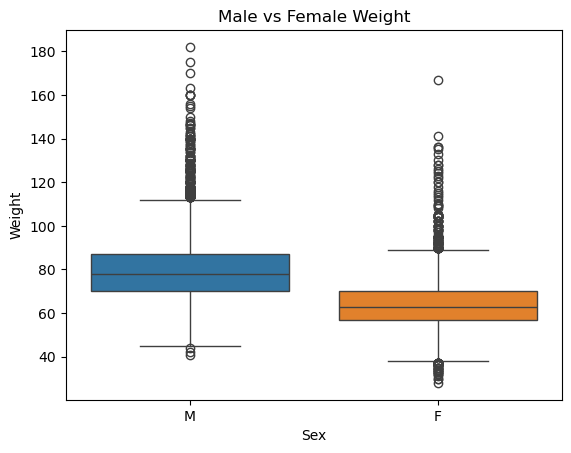

In [8]:
#create boxplot of male vs female weight
sns.boxplot(data=df, x='Sex', y='Weight', hue='Sex').set(title='Male vs Female Weight')

There are plenty of outliers in this data, lets see how mean changes when we remove these outliers using interquartile range. 

In [9]:
# Calculate quantiles for each group
low = 0.05
high = 0.95
res = df.groupby('Sex')['Weight'].quantile([low, high]).unstack(level=1)

# Filter rows within the quantile range
filtered_df = df[((res.loc[df['Sex'], low] < df['Weight'].values) &
                  (df['Weight'].values < res.loc[df['Sex'], high])).values]

[Text(0.5, 1.0, 'Male vs Female Weight')]

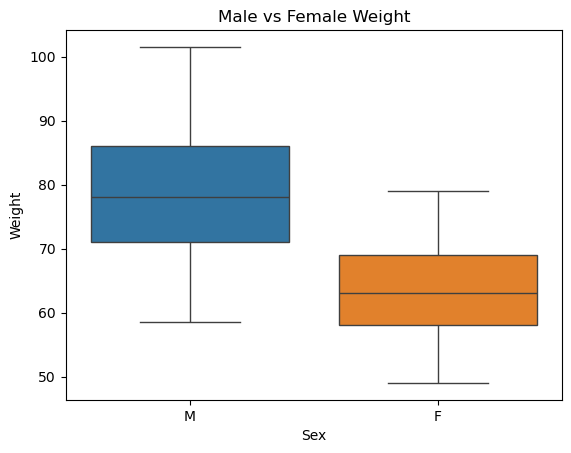

In [10]:
#create boxplot for data with outliers removed
sns.boxplot(data=filtered_df, x='Sex', y='Weight', hue='Sex').set(title='Male vs Female Weight')

In [11]:
#calculate means for data with outliers removed
filtered_df.groupby('Sex')['Weight'].mean()

Sex
F    63.255816
M    78.795356
Name: Weight, dtype: float64

In [12]:
#store male and female weights
female_weight = df['Weight'].loc[df['Sex']=='F']
male_weight = df['Weight'].loc[df['Sex']=='M']

In [13]:
# use two tailed test to determine significance between mean difference
t_statistic, p_value = stats.ttest_ind(a=male_weight, b=female_weight)

print('The two tailed test result is: ', t_statistic, ' with a p-value of : ', p_value)

The two tailed test result is:  81.50288828284516  with a p-value of :  0.0


The t-test performed above proves that the difference between male and female mean weight is significant and unlikely to occur due to chance. 

### 2. Correlation Coefficient

[Text(0.5, 1.0, 'Height vs Weight')]

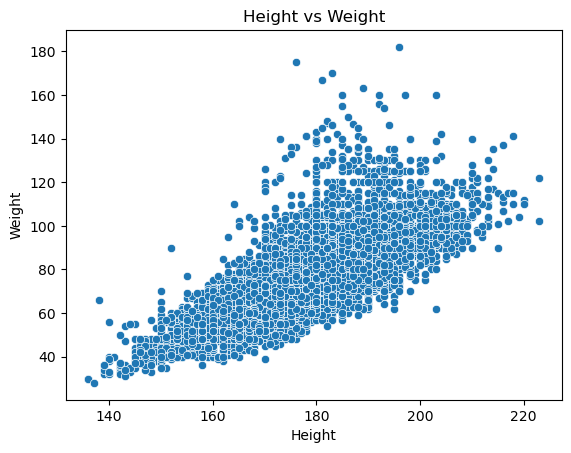

In [14]:
#create a scatterplot for height vs weight 
sns.scatterplot(data=df,x='Height',y='Weight').set(title='Height vs Weight')

In [15]:
stats.pearsonr(df['Height'],df['Weight'])

(0.7945545348628212, 0.0)

The pearsonr value given is 0.795, which indicates a moderate/high correlation between Height and Weight. The p-value is below 0.5 percent, so there is statistical significance for this correlation.

### 3. Linear Regression

R-squared: 0.631317


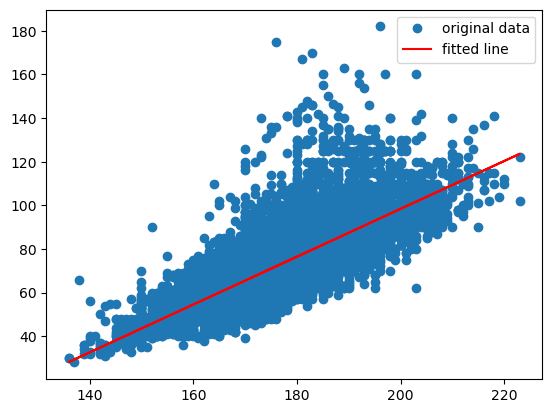

In [16]:
#Calculate linear regression and print R-Squared value
lreg = stats.linregress(df['Height'],df['Weight'])
print(f"R-squared: {lreg.rvalue**2:.6f}")

# plot data verus linear regression 
plt.plot(df['Height'],df['Weight'], 'o', label='original data')
plt.plot(df['Height'], lreg.intercept + lreg.slope*df['Height'], 'r', label='fitted line')
plt.legend()
plt.show()

In this plot we use linear regression to fit our data. We use this calculation to plot the fit and visualize that there is a positive linear correlation for height and weight. 

To investigate our model and improve it we can use ordinary least squares. 

In [17]:
#calculate residuals using ordinary least squares
model = ols('Weight ~ Height', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                 3.550e+04
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:40:01   Log-Likelihood:                -75169.
No. Observations:               20732   AIC:                         1.503e+05
Df Residuals:                   20730   BIC:                         1.504e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -120.9191      1.037   -116.598      0.0

The summary of our model states high multicolliniarity in the dataset. One way to test if this is true is with VIF. The durbin-watson statistics also shows that there is very slight autocorrelation in our dataset. In step 4 we will add another feature into the model, which should assist with autocorrelation.

In [68]:
X = df['Height'].values.reshape(-1, 1)
y=df['Weight'].values.reshape(-1, 1)
# Fit Ridge Regression 
ridge = Ridge(alpha=1)  
ridge.fit(X,y)

# Calculate R-squared
ridge.score(X,y)

0.6313169088709678

In this case, ridge regression did about the same as our original model.

In [69]:
# Fit PLS Regression model
pls = PLSRegression(n_components=3)  # Specify the number of components
pls.fit(X, y)

pls.score(X,y)

0.6313169088710742

### 4. Multiple Regression Model

In [20]:
#define X and y
X2 = df[['Height','Age']]
y2 = df['Weight']

# fit model
regr = LinearRegression()
regr.fit(X2, y2)
print(regr.coef_)

[1.08542008 0.30062414]


In [76]:
#investigate multicollinearity with vif
vif_data = pd.DataFrame() 
vif_data["feature"] = X2.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X2.values, i) 
                          for i in range(len(X2.columns))] 
  
print(vif_data)

  feature       VIF
0  Height  28.86369
1     Age  28.86369


These correlation coefficients from the multiple regression data tell us that for every kilogram increase we can expect a 1.08 centimeter increase and 0.3 increase in age of the individual. 

Using VIF we can see the multicollinearity of the data is high.

In [60]:
regr.score(X2,y2)

0.6395581399614926

The score function give the R squared value of our model. The closer the R squared value is to one, the better our model is at predicting weight in our dataset based off of age and height. This score is above the halfway threshold, but may be able to be improved upon by removing some of the variablility in our dataset. 

We can try introducing polynomial features to correct the affects multicollinearity on our model.

In [75]:
# Transform features to polynomial features
poly_features = PolynomialFeatures(degree=6) 

X2_poly = poly_features.fit_transform(X2)
poly_model = LinearRegression()
poly_model.fit(X2_poly, y2)

poly_model.score(X2_poly, y2)

0.6465377087377857

Using polynomial features on the model with a high degree has improved the model slightly. However, it is important to be mindful of overfitting on data when increasing degree. 

### 5. Solutions

__No Multicollinearity__ in linear regression is the assumption that independent variables in our dataset do not have a high correlation with one another. To assess if there are multiple correlated variables in a dataset, we can utilize scatterplots or variance_inflation_factor from statsmodels in python.

__Homoscedasticity__ in linear regression is the assumption that there is a constant variance of the errors of each independent variable. 
When heteroscedasticity is present in a dataset, it may warrant using a different regression model that does not assume homoscedasticity, such as generalized linear model. To test if there is heteroscedasticity in the dataset visually, we can plot our residuals vs fitted values. We can also use scores like Breusch-Pagan. 

To demonstrate multicollinearity, we will use a salary dataset. There are many factors that can affect salary, so this makes it a good potential candidate to investigate multicollinearity.

In [23]:
data2 = pd.read_csv('Salary Data.csv')
df2 = pd.DataFrame(data2)

In [24]:
df2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [26]:
df2.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [27]:
df2 = df2.dropna()

<AxesSubplot:>

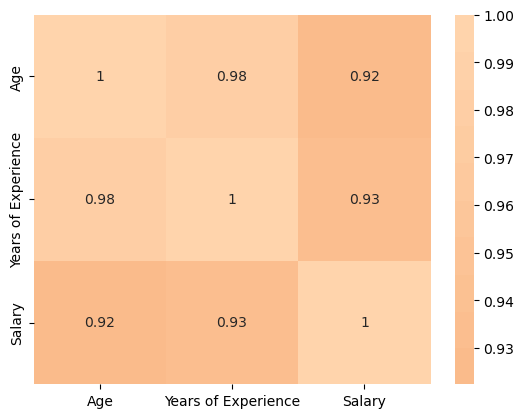

In [28]:
#use correlation matrix and heatmap to identify correlated features
cmatrix= df2.corr()
sns.heatmap(cmatrix,annot=True, center=0)

From the cell above we can see that we have two fetures impacting salary: Age and Years of experince.

In [50]:
# VIF stat to further investigate multicollinearity
X3 = df2[['Age','Years of Experience']]
y3 = df2['Salary']

vif_data2 = pd.DataFrame() 
vif_data2["feature"] = X3.columns 
  
# calculating VIF for each feature 
vif_data2["VIF"] = [variance_inflation_factor(X3.values, i) 
                          for i in range(len(X3.columns))] 
  
print(vif_data2)

               feature       VIF
0                  Age  6.675028
1  Years of Experience  6.675028


Anything above 4 is considered to have moderate multicollinearity.

<AxesSubplot:title={'center':'Years of Experience'}, xlabel='Years of Experience', ylabel='Salary'>

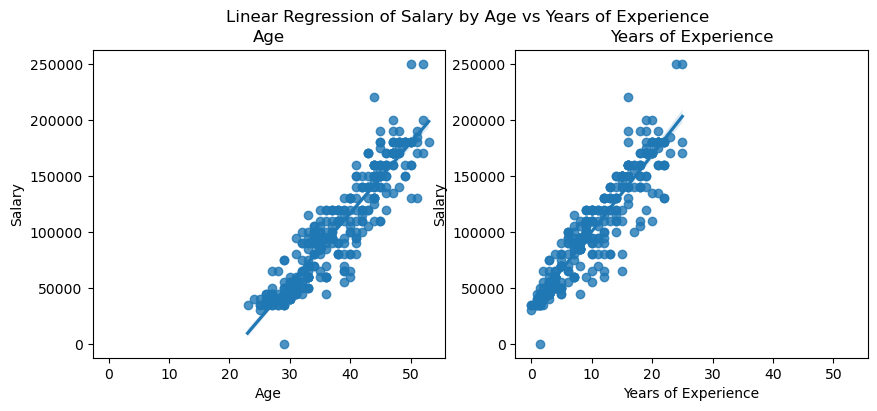

In [47]:
#use seaborns reg plot to plot linear regression
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
figure.suptitle('Linear Regression of Salary by Age vs Years of Experience')
axes[0].set_title('Age')
axes[1].set_title('Years of Experience')

sns.regplot(ax=axes[0], data=df2, x='Age', y='Salary')
sns.regplot(ax=axes[1], data=df2, x='Years of Experience', y='Salary')

We can further investigate the fit of features by using seaborns regplot on our features. 

In [70]:
# model using linear regression
# fit model
regr2 = LinearRegression()
regr2.fit(X3, y3)
print(regr2.coef_)
print(regr2.score(X3,y3))

[1885.82915975 4853.84338322]
0.868682932083954


These correlation coefficients from the multiple regression data tell us that for every year in age increase we can expect a 1885 dollar inrease in salary. For every year of experience increace we can expect a 4853 dollar in salary. 

The R-squared value on this data is is much closer to one than the data set investigated in questions. This model performs quite well at predicting salary data. However, the multiple regression model only performs slightly better than linear regression on these values alone. 

### 6.Nonlinear Model

In [77]:
# Transform features to polynomial features
poly2_features = PolynomialFeatures(degree=6) 

X3_poly = poly2_features.fit_transform(X3)
poly2_model = LinearRegression()
poly2_model.fit(X3_poly, y3)

poly2_model.score(X3_poly, y3)

0.8866279905370335

Using polynomial features on the model with a high degree has improved the model. However, it is important to be mindful of overfitting on data when increasing degree. 